## Titanic-Passenger-Survival-Prediction

One of the famous stories is Titanic a luxury steamship that sank into the deep blue ocean in 1912. Leading to the deaths of more than 1,500 passengers and crew. But it seems some groups of people were more likely to survive than others. In this project, we will use a machine learning technique in order to analyze and build a predictive model to find the factors and predict passenger who is to survive or die from this catastrophe. 

#### Data description:

1) Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.

2) Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

3) Name - Name

4) Sex - Sex

5) Age - Age

6) Sibsp - Number of Siblings/Spouses Aboard

7) Parch - Number of Parents/Children Aboard

8) Ticket - Ticket Number

9) Fare - Passenger Fare

10) Cabin - Cabin

11) Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Datasets

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

### Exploring the data

In [3]:
train_data.shape

(891, 12)

In [4]:
test_data.shape

(418, 11)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
train_data['Ticket'].nunique()

681

In [11]:
train_data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_data[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [14]:
train_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [15]:
train_copy = train_data.copy()
test_copy = test_data.copy()

In [16]:
train = train_copy.drop(['PassengerId','Ticket'], axis=1)

In [17]:
test = test_copy.drop(['PassengerId','Ticket'], axis=1)

In [18]:
print(test.columns)

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')


In [19]:
print(train.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [20]:
complete_data = [train,test]

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [23]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [24]:
train['Cabin'].fillna('U',inplace=True)
train['Cabin'] = train['Cabin'].apply(lambda x:x[0])

test['Cabin'].fillna('U',inplace=True)
test['Cabin'] = test['Cabin'].apply(lambda x:x[0])

In [25]:
train['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [26]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,U,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,U,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,U,S


In [27]:
for data_set in complete_data:
    data_set['Cabin'] = data_set['Cabin'].fillna('U')
    data_set['Cabin'] = data_set['Cabin'].apply(lambda x: x[0])

In [28]:
pd.crosstab(train['Cabin'], train['Survived'])

Survived,0,1
Cabin,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
T,1,0
U,481,206


In [29]:
train[['Cabin','Survived']].groupby(['Cabin'],as_index=False).mean().sort_values(by='Survived', ascending=True)

,Cabin,Survived
7,T,0.000000
8,U,0.299854
0,A,0.466667
6,G,0.500000
2,C,0.593220
5,F,0.615385
1,B,0.744681
4,E,0.750000
3,D,0.757576


In [30]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['Cabin'] = label_encoder.fit_transform(train['Cabin'])
test['Cabin'] = label_encoder.fit_transform(test['Cabin'])

In [31]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,8,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,8,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,8,S


In [32]:
train['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [33]:
train['Name'][0].split(', ')[1].split('.')[0]

'Mr'

In [34]:
for data_set in complete_data:
    data_set['Title'] = data_set['Name'].map(lambda x: x.split(', ')[1].split('.')[0])
    
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23
Miss,55,127


In [35]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [36]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [37]:
train['Title'] = train['Title'].replace(['Lady','Countess','the Countess','Capt', 'Col','Don', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'rare')
train['Title'] = train['Title'].replace('Mlle','Miss')
train['Title'] = train['Title'].replace('Ms','Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
train['Title'] = train['Title'].replace('Sir', 'Mr')
train['Title'] = train['Title'].replace('Dr', 'Mr')

In [38]:
test['Title'] = test['Title'].replace(['Lady','Countess','the Countess','Capt', 'Col','Don', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'rare')
test['Title'] = test['Title'].replace('Mlle','Miss')
test['Title'] = test['Title'].replace('Ms','Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
test['Title'] = test['Title'].replace('Sir', 'Mr')
test['Title'] = test['Title'].replace('Dr', 'Mr')

In [39]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'rare'], dtype=object)

In [40]:
title_mapping = {"Mrs": 4, "Miss": 3, "Mr": 1, "Master": 2, "Rare": 0}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

In [41]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,8,S,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,2,C,4.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,8,S,3.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,2,S,4.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,8,S,1.0


In [42]:
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0 }).astype(int)

In [43]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,8,S,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,C,4.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,8,S,3.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,S,4.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,8,S,1.0


In [44]:
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0 }).astype(int)

In [45]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,7,Q,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,7,S,4.0
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,7,Q,1.0
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,7,S,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,7,S,4.0


In [46]:
train['Age'].fillna(train['Age'].dropna().median(),inplace=True)

In [47]:
test['Age'].fillna(test['Age'].dropna().median(),inplace=True)

In [48]:
test['Fare'].fillna(train['Fare'].dropna().median(), inplace = True)
train['Embarked'].fillna('C', inplace = True)
test['Embarked'].fillna('C', inplace = True)

In [49]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='Survived')

,AgeBand,Survived
4,"(64.084, 80.0]",0.090909
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
0,"(0.34, 16.336]",0.550000


In [50]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,8,S,1.0,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,C,4.0,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,8,S,3.0,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,S,4.0,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,8,S,1.0,"(32.252, 48.168]"


In [51]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [52]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,8,S,1.0,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,C,4.0,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,8,S,3.0,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2,S,4.0,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,8,S,1.0,"(32.252, 48.168]"


In [53]:
for i in range(len(train['Age'])):
    if train['Age'][i] <= 16:
        train['Age'][i] = 4
    if train['Age'][i] > 16 and train['Age'][i] <=32:
        train['Age'][i] = 1
    if train['Age'][i] > 32 and train['Age'][i] <=48:
        train['Age'][i] = 2
    if train['Age'][i] > 48 and train['Age'][i] <=64:
        train['Age'][i] = 1
    if train['Age'][i] > 64:
        train['Age'][i] = 0

<ipython-input-53-b4b9345cf459>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = 1
<ipython-input-53-b4b9345cf459>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = 2
<ipython-input-53-b4b9345cf459>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = 1
<ipython-input-53-b4b9345cf459>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [54]:
train['Age'].unique()

array([1., 2., 4., 0.])

In [55]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,8,S,1.0,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,2,C,4.0,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,8,S,3.0,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,2,S,4.0,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,8,S,1.0,"(32.252, 48.168]"


In [56]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,7,Q,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,7,S,4.0
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,7,Q,1.0
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,7,S,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,7,S,4.0


In [57]:
for i in range(len(test['Age'])):
    if test['Age'][i] <= 16:
        test['Age'][i] = 4
    if test['Age'][i] > 16 and test['Age'][i] <=32:
        test['Age'][i] = 1
    if test['Age'][i] > 32 and test['Age'][i] <=48:
        test['Age'][i] = 2
    if test['Age'][i] > 48 and test['Age'][i] <=64:
        test['Age'][i] = 1
    if test['Age'][i] > 64:
        test['Age'][i] = 0

<ipython-input-57-2124429e402b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i] = 2
<ipython-input-57-2124429e402b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i] = 1
<ipython-input-57-2124429e402b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i] = 1
<ipython-input-57-2124429e402b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [58]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",0,2.0,0,0,7.8292,7,Q,1.0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,7.0000,7,S,4.0
2,2,"Myles, Mr. Thomas Francis",0,1.0,0,0,9.6875,7,Q,1.0
3,3,"Wirz, Mr. Albert",0,1.0,0,0,8.6625,7,S,1.0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,12.2875,7,S,4.0


In [59]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [60]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [61]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

In [62]:
train['Family_size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [63]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

In [64]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand,Family_size
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,7.2500,8,S,1.0,"(16.336, 32.252]",2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,71.2833,2,C,4.0,"(32.252, 48.168]",2
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,7.9250,8,S,3.0,"(16.336, 32.252]",1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,53.1000,2,S,4.0,"(32.252, 48.168]",2
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,8.0500,8,S,1.0,"(32.252, 48.168]",1


In [65]:
train[['Family_size','Survived']].groupby(['Family_size']).mean().sort_values(by='Survived', ascending=False)

,Survived
Family_size,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [66]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [67]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [68]:
for i in range(len(train['Fare'])):
    if train['Fare'][i] <= 7.91:
        train['Fare'][i] = 0
    if train['Fare'][i] > 7.91 and train['Fare'][i] <=14.454:
        train['Fare'][i] = 1
    if train['Fare'][i] > 14.454 and train['Fare'][i] <=31:
        train['Fare'][i] = 2
    if train['Fare'][i] > 31:
        train['Fare'][i] = 3

<ipython-input-68-ec61e4bf504f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fare'][i] = 0
<ipython-input-68-ec61e4bf504f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fare'][i] = 3
<ipython-input-68-ec61e4bf504f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Fare'][i] = 1
<ipython-input-68-ec61e4bf504f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [69]:
for i in range(len(test['Fare'])):
    if test['Fare'][i] <= 7.91:
        test['Fare'][i] = 0
    if test['Fare'][i] > 7.91 and test['Fare'][i] <=14.454:
        test['Fare'][i] = 1
    if test['Fare'][i] > 14.454 and test['Fare'][i] <=31:
        test['Fare'][i] = 2
    if test['Fare'][i] > 31:
        test['Fare'][i] = 3

<ipython-input-69-6821e16fbd47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][i] = 0
<ipython-input-69-6821e16fbd47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][i] = 1
<ipython-input-69-6821e16fbd47>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][i] = 2
<ipython-input-69-6821e16fbd47>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [70]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,AgeBand,Family_size,FareBand
0,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,0.0,8,0,1.0,"(16.336, 32.252]",2,"(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,3.0,2,1,4.0,"(32.252, 48.168]",2,"(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,1.0,8,0,3.0,"(16.336, 32.252]",1,"(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,3.0,2,0,4.0,"(32.252, 48.168]",2,"(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",0,2.0,0,0,1.0,8,0,1.0,"(32.252, 48.168]",1,"(7.91, 14.454]"


In [71]:
train['Fare'] = train['Fare'].astype(int)

In [72]:
test['Fare'] = test['Fare'].astype(int)

In [73]:
train = train.drop(['AgeBand', 'Name', 'SibSp', 'Parch','FareBand' ], axis = 1)
test = test.drop(['Name', 'SibSp', 'Parch'], axis = 1)

In [74]:
train = train.dropna()

In [75]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x_train = train.drop('Survived', axis = 1)
y_train = train.Survived

print(x_train.shape)
print(y_train.shape)

(876, 8)
(876,)


In [76]:
test.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,3,0,2.0,0,7,2,1.0,1
1,3,1,2.0,0,7,0,4.0,2
2,2,0,1.0,1,7,2,1.0,1
3,3,0,1.0,1,7,0,1.0,1
4,3,1,1.0,1,7,0,4.0,3


In [77]:
x_test = test
print(x_test.shape)

(418, 8)


In [78]:
x_test = x_test.dropna()

In [79]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
x_train = scaler_X.fit_transform(x_train)
x_test = scaler_X.fit_transform(x_test)

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
print(pca.explained_variance_ratio_)

[0.3388943  0.21543132 0.17893906 0.11385842 0.08176904 0.04703902
 0.01876272 0.00530612]


In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
print(pca.explained_variance_ratio_)

[0.3388943  0.21543132 0.17893906 0.11385842 0.08176904]


In [82]:

x_train.shape

(876, 5)

In [83]:
y_train.shape

(876,)

In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Training Accuracy :', model.score(x_train, y_train))

Training Accuracy : 0.7968036529680366


In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cross_validation = StratifiedKFold(n_splits = 5)

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = cross_validation)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.7842532467532467
Mean Standard Deviation:  0.012069854867625882


In [86]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid)

Training Accuracy : 0.8470319634703196


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = StratifiedKFold(n_splits = 5))
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.810525974025974
Mean Standard Deviation:  0.03902799657658487


In [88]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid)

Training Accuracy : 0.882420091324201


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = StratifiedKFold(n_splits = 5))
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.7990974025974026
Mean Standard Deviation:  0.021085410485328377


In [90]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print("Validation Accuracy :", model.score(x_valid, y_valid)

Training Accuracy : 0.9006849315068494


In [91]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.80141065830721
Mean Standard Deviation:  0.035880818874557005


In [92]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


print("Training Accuracy :", model.score(x_train, y_train))
#print('Validation Accuracy: ', model.score(x_valid, y_valid))

Training Accuracy : 0.9006849315068494


<AxesSubplot:title={'center':'Feature Importances'}, ylabel='name'>

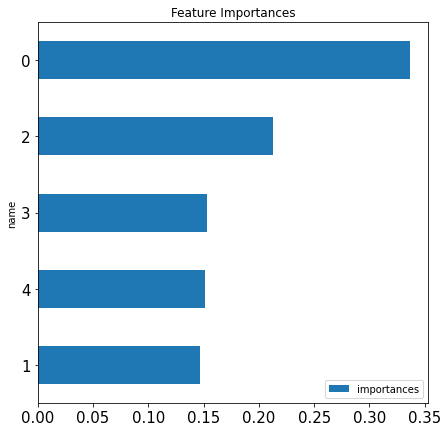

In [93]:
feature = pd.DataFrame()
x_train = pd.DataFrame(x_train)

feature['name'] = x_train.columns
feature['importances'] = model.feature_importances_

feature.sort_values(by = ['importances'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', figsize = (7, 7), title = 'Feature Importances', fontsize = 15)

In [94]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print('Mean Accuracy:', cvs.mean())
print('Mean Standard Deviation: ', cvs.std())

Mean Accuracy: 0.8116640543364679
Mean Standard Deviation:  0.0333843355823392
